<a href="https://colab.research.google.com/github/ZhijiaoGao/Programming-Course/blob/main/UFOWorkbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Read data in
import pandas as pd
ufo_sightings = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-06-20/ufo_sightings.csv')
places = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-06-20/places.csv')
day_parts_map = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-06-20/day_parts_map.csv')


In [ ]:
display(ufo_sightings.head())
display(places.head())
display(day_parts_map.head())



,reported_date_time,reported_date_time_utc,posted_date,city,state,country_code,shape,reported_duration,duration_seconds,summary,has_images,day_part
0,2022-08-29T06:03:00Z,2022-08-29T06:03:00Z,2022-09-09,Pinehurst,NC,US,NaN,15 mins,900.0,Saw multi color object above horizon.,False,night
1,2022-08-20T01:51:00Z,2022-08-20T01:51:00Z,2022-10-08,Rapid City,MI,US,NaN,1 minute,60.0,An object in the shape of a straight line abou...,False,nautical dusk
2,2022-08-13T05:30:00Z,2022-08-13T05:30:00Z,2022-09-09,Cleveland,OH,US,NaN,2 hours,172800.0,Tone in the air.,False,night
3,2022-08-06T21:00:00Z,2022-08-06T21:00:00Z,2022-09-09,Bloomington,IN,US,NaN,30 seconds,30.0,Black tic-tac shaped ufo. Moved with insane speed,False,afternoon
4,2022-08-04T07:40:00Z,2022-08-04T07:40:00Z,2022-09-09,Irvine,CA,US,NaN,3 minutes,180.0,Two alien were scanning me,False,night


,city,alternate_city_names,state,country,country_code,latitude,longitude,timezone,population,elevation_m
0,Pinehurst,"Pajnkherst,bynhwrst,pynhwrst karwlynay shmaly...",NC,USA,US,35.19543,-79.46948,America/New_York,15752,160.0
1,Rapid City,NaN,MI,USA,US,44.83445,-85.28256,America/Detroit,1352,192.0
2,Cleveland,"CLE,Cleaveland,Cleveland,Forest City,Klevalehn...",OH,USA,US,41.49950,-81.69541,America/New_York,388072,199.0
3,Bloomington,"BMG,Bloomington,Blumington,Blumingtona,Bluming...",IN,USA,US,39.16533,-86.52639,America/Indiana/Indianapolis,84067,235.0
4,Irvine,"rvajn,Ervajn,Irvajn,Irvin,Irvinas,Irvine,abain...",CA,USA,US,33.66946,-117.82311,America/Los_Angeles,256927,17.0


,rounded_lat,rounded_long,rounded_date,astronomical_twilight_begin,nautical_twilight_begin,civil_twilight_begin,sunrise,solar_noon,sunset,civil_twilight_end,nautical_twilight_end,astronomical_twilight_end
0,40,-80,2022-08-28,09:07:43,09:42:49,10:16:18,10:42:53,17:21:10,23:59:27,00:26:02,00:59:31,01:34:37
1,40,-90,2022-08-21,09:38:33,10:14:53,10:49:12,11:16:15,18:03:05,00:49:55,01:16:58,01:51:17,02:27:37
2,40,-80,2022-08-14,08:48:54,09:26:40,10:01:56,10:29:32,17:24:39,00:19:45,00:47:21,01:22:37,02:00:24
3,40,-90,2022-08-07,09:19:00,09:58:23,10:34:41,11:02:53,18:05:45,01:08:37,01:36:50,02:13:08,02:52:31
4,30,-120,2022-08-07,11:55:02,12:26:50,12:57:22,13:21:39,20:05:45,02:49:51,03:14:07,03:44:39,04:16:27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96429 entries, 0 to 96428
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   reported_date_time      96429 non-null  object 
 1   reported_date_time_utc  96429 non-null  object 
 2   posted_date             96429 non-null  object 
 3   city                    96429 non-null  object 
 4   state                   96344 non-null  object 
 5   country_code            96429 non-null  object 
 6   shape                   94390 non-null  object 
 7   reported_duration       96429 non-null  object 
 8   duration_seconds        96429 non-null  float64
 9   summary                 96398 non-null  object 
 10  has_images              96429 non-null  bool   
 11  day_part                93866 non-null  object 
dtypes: bool(1), float64(1), object(10)
memory usage: 8.2+ MB


In [ ]:
UFO_freq = ufo_sightings.dropna(subset=['country_code', 'state'])
UFO_freq
UFO_freq = UFO_freq[UFO_freq['country_code'] == 'US']
UFO_freq

,reported_date_time,reported_date_time_utc,posted_date,city,state,country_code,shape,reported_duration,duration_seconds,summary,has_images,day_part
0,2022-08-29T06:03:00Z,2022-08-29T06:03:00Z,2022-09-09,Pinehurst,NC,US,NaN,15 mins,900.0,Saw multi color object above horizon.,False,night
1,2022-08-20T01:51:00Z,2022-08-20T01:51:00Z,2022-10-08,Rapid City,MI,US,NaN,1 minute,60.0,An object in the shape of a straight line abou...,False,nautical dusk
2,2022-08-13T05:30:00Z,2022-08-13T05:30:00Z,2022-09-09,Cleveland,OH,US,NaN,2 hours,172800.0,Tone in the air.,False,night
3,2022-08-06T21:00:00Z,2022-08-06T21:00:00Z,2022-09-09,Bloomington,IN,US,NaN,30 seconds,30.0,Black tic-tac shaped ufo. Moved with insane speed,False,afternoon
4,2022-08-04T07:40:00Z,2022-08-04T07:40:00Z,2022-09-09,Irvine,CA,US,NaN,3 minutes,180.0,Two alien were scanning me,False,night
...,...,...,...,...,...,...,...,...,...,...,...,...
96424,1949-07-16T01:30:00Z,1949-07-16T01:30:00Z,1999-07-05,Booneville,MS,US,unknown,hours,18000.0,"Returning home from a movie, we witnessed a la...",False,nautical dusk
96425,1942-06-02T02:30:00Z,1942-06-02T02:30:00Z,2007-08-07,Hapeville,GA,US,unknown,2-3 min,180.0,"bright object approchjng Venus, 1940's",False,night
96426,2020-06-12T01:00:00Z,2020-06-12T01:00:00Z,2009-05-12,Cicero,IN,US,unknown,1 minute,60.0,((NUFORC Note: Probable hoax. Note date. PD...,False,afternoon
96427,2021-02-01T13:24:00Z,2021-02-01T13:24:00Z,2021-03-02,Crescent City,CA,US,unknown,2 minutes,120.0,"Straight line of lights in sky moving east,",False,night


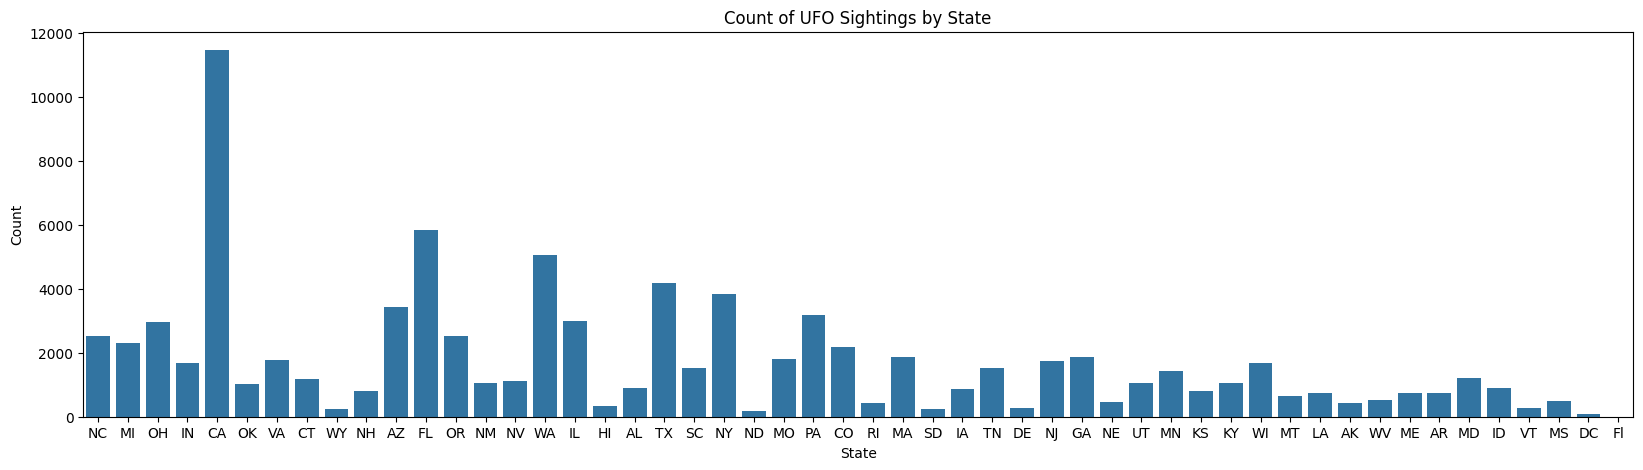

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
sns.countplot (x='state', data=UFO_freq)

plt.title('Count of UFO Sightings by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()